<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B3%5D_LLM_conflict_risk_estimation_Sudan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai
!pip uninstall openai -y
!pip install ipython-autotime
!pip install openai==0.27.0

In [ ]:
from google.colab import drive
import pandas as pd
%load_ext autotime
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 16.8 s (started: 2024-11-18 21:59:04 +00:00)


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/CONFLICT PREDICTION/Fall 2024/biweekly_Sudan_2023_FINAL.csv')
data['shifted_fatalities'] = data['sum(ACLED_Fatalities)'].shift(-1)

time: 638 ms (started: 2024-11-18 21:59:29 +00:00)


In [ ]:
data.columns

Index(['Unnamed: 0', 'timeslot', 'goldsteinscale', 'goldstein_min_max',
       'avgtone', 'events_density', 'unique_articles', 'nummentions',
       'numsources', 'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance',
       'shifted_fatalities'],
      dtype='object')

time: 3.37 ms (started: 2024-11-14 20:21:15 +00:00)


### GPT-4

In [ ]:
import openai
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up your OpenAI API key
openai.api_key = ''

# Define the function to get GPT-4 responses
def label_with_chatgpt(prompt, data):
    responses = []
    for _, row in data.iterrows():
        # Format the prompt with row-specific data
        full_prompt = prompt.format(
            country='Sudan',
            summarized_articles=row['summaries'],
            sentiment=row['sentiment'],
            sentiment_std=row['sentiment_std'],
            avgtone=row['avgtone'],
            cosine_similarity_positive=row['cosine_similarity_positive'],
            cosine_similarity_negative=row['cosine_similarity_negative'],
            goldsteinscale=row['goldsteinscale'],
            goldstein_min_max=row['goldstein_min_max'],
            unique_articles=row['unique_articles'],
            nummentions=row['nummentions'],
            numsources=row['numsources'],
            events_density=row['events_density'],
            topic_1=row['topic_1'],
            topic_2=row['topic_2'],
            topic_3=row['topic_3'],
            dominance_score_1=row['dominance_score_1'],
            dominance_score_2=row['dominance_score_2'],
            dominance_score_3=row['dominance_score_3'],
            avg_embeddings=row['avg_embeddings'],
            summaries=row['summaries'],
            keywords=row['keywords']
        )

        # Get response from GPT-4
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4-turbo",
                messages=[{"role": "user", "content": full_prompt}],
                max_tokens=50,
                temperature=0.5
            )
            label = response['choices'][0]['message']['content'].strip()
            responses.append(label)
        except Exception as e:
            print(f"Error getting response: {e}")
            responses.append("Error")

    return responses

# Define your prompt template
prompt_template = """
Please review the list of features from a 2-week timeline in {country} based on regional news articles.

Recent bi-weekly summary for {country}:

1. Summarized Articles: "{summarized_articles}"

2. Sentiment Score: {sentiment}
   - Sentiment Score Standard Deviation: {sentiment_std}
   - Average Tone: {avgtone}

3. Cosine Similarity:
   - To Conflict Set: {cosine_similarity_positive}
   - To Non-Conflict Set: {cosine_similarity_negative}

4. Goldstein Score: {goldsteinscale}
   - Min/Max Goldstein: [{goldstein_min_max}]

5. Total Articles: {unique_articles}
   - Total Mentions of event: {nummentions}
   - Total Sources: {numsources}
   - Event Density: {events_density}

6. Top Topics:
   - Topic 1: "{topic_1}" ({dominance_score_1})
   - Topic 2: "{topic_2}" ({dominance_score_2})
   - Topic 3: "{topic_3}" ({dominance_score_3})

7. Articles:
   - Summaries: {summaries}
   - Average Embedding: {avg_embeddings}

8. Keywords: {keywords}

Question:
Based on the above features, assess the likelihood of conflict escalation in {country} within the next 14 days. Provide a likelihood score (0 to 1) and a brief explanation.
"""

# Get labels using GPT-4
data = data
labels_eng_prompt = label_with_chatgpt(prompt_template, data)

# Convert the labels into a DataFrame
labels_df = pd.DataFrame(labels_eng_prompt, columns=["GPT_Label"])

# Save results (if needed)
labels_df.to_csv('gpt_labels.csv', index=False)


labels_df

,GPT_Label
0,**Likelihood Score: 0.7**\n\n**Explanation:**\...
1,Likelihood Score: 0.65\n\nExplanation:\nThe li...
2,**Likelihood Score: 0.65**\n\n**Explanation:**...
3,Likelihood Score: 0.65\n\nExplanation:\nThe as...
4,**Likelihood Score for Conflict Escalation in ...
5,**Likelihood of Conflict Escalation in Sudan w...
6,"Based on the provided features, the likelihood..."
7,**Likelihood Score of Conflict Escalation in S...
8,**Likelihood Score of Conflict Escalation in S...
9,**Likelihood Score of Conflict Escalation in S...


time: 1min 14s (started: 2024-11-14 19:37:19 +00:00)


In [ ]:
labels_df.to_csv('/content/gdrive/MyDrive/CONFLICT PREDICTION/Fall 2024/Experiments Results/gpt_labels.csv', index=False)

time: 17.4 ms (started: 2024-11-14 20:20:34 +00:00)


In [ ]:
# hand typed here - need to find a solution to extract this from GPT labels
gpt_probabilities = [0.7, 0.65, 0.65, 0.65, 0.7, 0.85, 0.85, 0.75, 0.85, 0.85, 0.75, 0.85, 0.85, 0.8, 0.75, 0.75, 0.65, 0.75, 0.7, 0.75, 0.7, 0.75, 0.75, 0.75, 0.85  ]

time: 738 µs (started: 2024-11-18 22:33:01 +00:00)


In [ ]:
len(gpt_probabilities)

25

time: 3.08 ms (started: 2024-11-14 20:20:40 +00:00)


In [ ]:
len(data['backlogged_importance'])

25

time: 3.03 ms (started: 2024-11-14 20:20:41 +00:00)


In [ ]:
# correlation with fatalities

import scipy.stats

list1 = gpt_probabilities
list2 = data['shifted_fatalities'].fillna(data['shifted_fatalities'].mean()).to_list()

# Ensure the two lists have the same length
min_length = min(len(list1), len(list2))
list1 = list1[:min_length]
list2 = list2[:min_length]

# Calculate the Pearson correlation coefficient
correlation, p_value = scipy.stats.pearsonr(list1, list2)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Pearson Correlation: 0.529
P-value: 0.009
time: 10.7 ms (started: 2024-11-14 20:23:33 +00:00)


In [ ]:
# correlation with log value
import scipy.stats

list1 = gpt_probabilities
df = np.log10(data['shifted_fatalities'])
list2 = df.fillna(df.mean()).to_list()

# Ensure the two lists have the same length
min_length = min(len(list1), len(list2))
list1 = list1[:min_length]
list2 = list2[:min_length]

# Calculate the Pearson correlation coefficient
correlation, p_value = scipy.stats.pearsonr(list1, list2)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation: 0.609
P-value: 0.001
time: 7.89 ms (started: 2024-11-18 22:58:07 +00:00)


### Claude

In [ ]:
!pip install anthropic
import anthropic
import pandas as pd

API_KEY = ""

# Initialize the Anthropic client
client = anthropic.Client(api_key=API_KEY)

# Define a function to query Claude
def query_claude(prompt, max_tokens=300):
    try:
        response = client.completions.create(
            model="claude-2",
            prompt=f"{anthropic.HUMAN_PROMPT} {prompt}{anthropic.AI_PROMPT}",
            max_tokens_to_sample=max_tokens,
            temperature=0.7
        )
        return response.completion.strip()
    except Exception as e:
        print(f"Error querying Claude: {e}")
        return "Error"

# Function to label data using Claude
def label_with_claude(prompt, data):
    responses = []
    for _, row in data.iterrows():
        # Format the prompt with row-specific data
        full_prompt = prompt.format(
            country='Sudan',
            summarized_articles=row['summaries'],
            sentiment=row['sentiment'],
            sentiment_std=row['sentiment_std'],
            avgtone=row['avgtone'],
            cosine_similarity_positive=row['cosine_similarity_positive'],
            cosine_similarity_negative=row['cosine_similarity_negative'],
            goldsteinscale=row['goldsteinscale'],
            goldstein_min_max=row['goldstein_min_max'],
            unique_articles=row['unique_articles'],
            nummentions=row['nummentions'],
            numsources=row['numsources'],
            events_density=row['events_density'],
            topic_1=row['topic_1'],
            topic_2=row['topic_2'],
            topic_3=row['topic_3'],
            dominance_score_1=row['dominance_score_1'],
            dominance_score_2=row['dominance_score_2'],
            dominance_score_3=row['dominance_score_3'],
            avg_embeddings=row['avg_embeddings'],
            summaries=row['summaries'],
            keywords=row['keywords']
        )

        # Get response from Claude
        label = query_claude(full_prompt, max_tokens=50)
        responses.append(label)

    return responses

# Example usage with sample DataFrame
if __name__ == "__main__":
    # Sample data for testing
    data = data

    # Define your prompt template
    prompt_template = """
Please review the list of features from a 2-week timeline in {country} based on regional news articles.

Recent bi-weekly summary for {country}:

1. Summarized Articles: "{summarized_articles}"

2. Sentiment Score: {sentiment}
   - Sentiment Score Standard Deviation: {sentiment_std}
   - Average Tone: {avgtone}

3. Cosine Similarity:
   - To Conflict Set: {cosine_similarity_positive}
   - To Non-Conflict Set: {cosine_similarity_negative}

4. Goldstein Score: {goldsteinscale}
   - Min/Max Goldstein: [{goldstein_min_max}]

5. Total Articles: {unique_articles}
   - Total Mentions of event: {nummentions}
   - Total Sources: {numsources}
   - Event Density: {events_density}

6. Top Topics:
   - Topic 1: "{topic_1}" ({dominance_score_1})
   - Topic 2: "{topic_2}" ({dominance_score_2})
   - Topic 3: "{topic_3}" ({dominance_score_3})

7. Articles:
   - Summaries: {summaries}
   - Average Embedding: {avg_embeddings}

8. Keywords: {keywords}

Question:
Based on the above features, assess the likelihood of conflict escalation in {country} within the next 14 days. Provide a likelihood score (0 to 1) FIRST, and then provide a brief explanation.
"""

    # Label the data using Claude
    labeled_data = label_with_claude(prompt_template, data)
    for i, label in enumerate(labeled_data):
        print(f"Row {i + 1} label: {label}")


Row 1 label: Based on the features summarized, there appears to be a moderate likelihood of conflict escalation in Sudan in the next 14 days.

Likelihood score: 0.6

In support of escalation, the sentiment score is quite negative (-0.
Row 2 label: Based on the features summarized, I would assess the likelihood of conflict escalation in Sudan in the next 14 days as moderate. 

Likelihood score: 0.6

In support of this assessment:
- The sentiment score is moderately positive (
Row 3 label: Based on the features summarized:

Likelihood of conflict escalation in the next 14 days: 0.52

In explaining this moderate likelihood score:
- The sentiment, tone, and cosine similarity scores do not indicate high risk levels
-
Row 4 label: Based on the features summarized, there is a moderate likelihood of conflict escalation in Sudan in the next 14 days.

Likelihood score: 0.6

In explaining my assessment:

- The sentiment score is moderately negative (-0.
Row 5 label: Based on the features summariz

In [ ]:
claude_labels = [0.6,0.6, 0.52, 0.6, 0.35, 0.7, 0.7, 0.6, 0.6, 0.8, 0.6, 0.68, 0.75, 0.75, 0, 0.65, 0.6, 0.35, 0.52, 0.7,  0.65, 0.7, 0.6,  0.75, 0.72]

time: 711 µs (started: 2024-11-18 22:27:31 +00:00)


In [ ]:
len( data['shifted_fatalities'].fillna(data['shifted_fatalities'].mean()))

25

time: 21.8 ms (started: 2024-11-18 22:30:23 +00:00)


In [ ]:
len(claude_labels)

25

time: 11.6 ms (started: 2024-11-18 22:30:37 +00:00)


In [ ]:
data.columns

Index(['Unnamed: 0', 'timeslot', 'goldsteinscale', 'goldstein_min_max',
       'avgtone', 'events_density', 'unique_articles', 'nummentions',
       'numsources', 'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance',
       'shifted_fatalities'],
      dtype='object')

time: 7.63 ms (started: 2024-11-18 22:34:23 +00:00)


In [ ]:
import scipy.stats

list1 = claude_labels
#list2 = data['shifted_fatalities'].fillna(data['shifted_fatalities'].mean()).to_list()
list2 = data['sum(ACLED_Fatalities)'].fillna(data['sum(ACLED_Fatalities)'].mean()).to_list()

# Ensure the two lists have the same length
min_length = min(len(list1), len(list2))
list1 = list1[:min_length]
list2 = list2[:min_length]

# Calculate the Pearson correlation coefficient
correlation, p_value = scipy.stats.pearsonr(list1, list2)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Pearson Correlation: 0.082
P-value: 0.697
time: 5.45 ms (started: 2024-11-18 22:36:00 +00:00)


In [ ]:
len(data['shifted_fatalities'].fillna(data['shifted_fatalities'].mean()).to_list())

25

time: 8.17 ms (started: 2024-11-18 22:51:31 +00:00)


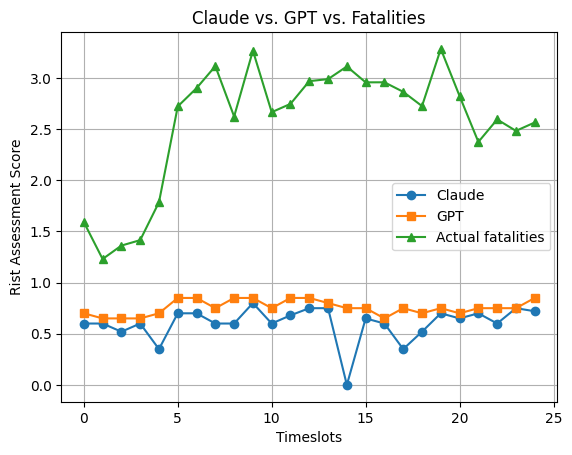

time: 356 ms (started: 2024-11-18 22:55:33 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = range(len(claude_labels))
y1 = claude_labels  # First list of Y-axis values
y2 = gpt_probabilities   # Second list of Y-axis values
#df = np.log10(data['shifted_fatalities'])
df = np.log10(data['sum(ACLED_Fatalities)'])
y3 = df.fillna(df.mean()).to_list()

# Plot the two lists
plt.plot(x, y1, label='Claude', marker='o')  # Plot the first list
plt.plot(x, y2, label='GPT', marker='s')  # Plot the second list
plt.plot(x, y3, label='Actual fatalities', marker='^')  # Plot the second list

# Add labels, title, and legend
plt.xlabel('Timeslots')
plt.ylabel('Rist Assessment Score')
plt.title('Claude vs. GPT vs. Fatalities')
plt.legend()

# Show the graph
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()


In [ ]:
import scipy.stats

list1 = claude_labels
#list2 = data['shifted_fatalities'].fillna(data['shifted_fatalities'].mean()).to_list()
list2 = gpt_probabilities

# Ensure the two lists have the same length
min_length = min(len(list1), len(list2))
list1 = list1[:min_length]
list2 = list2[:min_length]

# Calculate the Pearson correlation coefficient
correlation, p_value = scipy.stats.pearsonr(list1, list2)

print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Pearson Correlation: 0.364
P-value: 0.074
time: 4.5 ms (started: 2024-11-18 22:47:00 +00:00)
